In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2012-01-01'
end = '2025-5-21'
stock = 'GOOG'

data = yf.download(stock, start=start, end=end, auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [7]:
data.reset_index(inplace=True)

In [8]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475199,16.543040,16.152335,16.166449,147611217
1,2012-01-04,16.546259,16.595036,16.356602,16.465791,114989399
2,2012-01-05,16.316736,16.439543,16.247905,16.393986,131808205
3,2012-01-06,16.094152,16.341251,16.088457,16.320205,108119746
4,2012-01-09,15.411780,16.019379,15.381326,16.006997,233776981
...,...,...,...,...,...,...
3360,2025-05-14,166.609726,168.137888,160.736781,161.116329,31769200
3361,2025-05-15,165.201416,167.308883,163.643291,166.939332,22717600
3362,2025-05-16,167.228989,170.445124,166.749569,168.727188,36271400


In [9]:
ma_100_days = data.Close.rolling(100).mean()

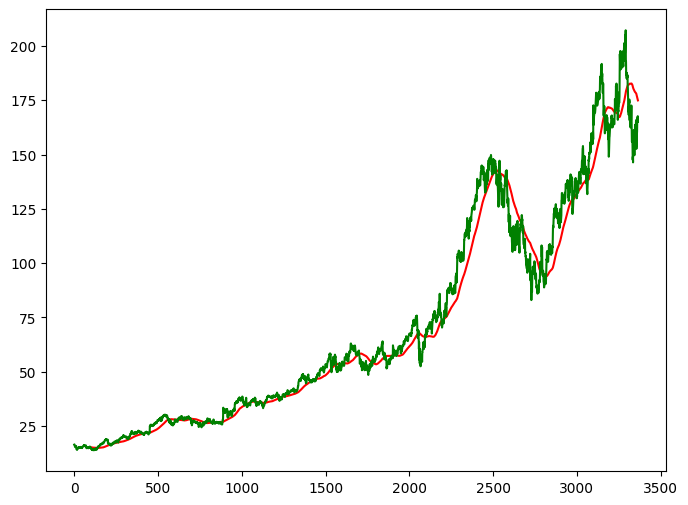

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

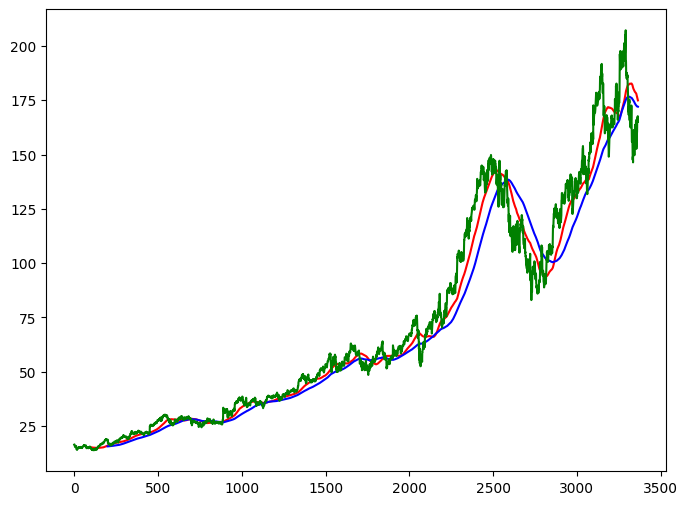

In [11]:
ma_200_days = data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [12]:
data.dropna(inplace=True)

In [13]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [14]:
data_train.shape[0]

2692

In [15]:
data_test.shape[0]

673

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_scale = scaler.fit_transform(data_train)

In [18]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [22]:
x, y = np.array(x), np.array(y)

In [23]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 37s 353ms/step - loss: 0.0563
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 41s 502ms/step - loss: 0.0060
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 37s 454ms/step - loss: 0.0050
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 31s 380ms/step - loss: 0.0050
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 29s 226ms/step - loss: 0.0046
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 35s 435ms/step - loss: 0.0037
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 32s 327ms/step - loss: 0.0041
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 39s 300ms/step - loss: 0.0034
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 26s 317ms/step - loss: 0.0033
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 26s 320ms/step - loss: 0.0035
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 35s 244ms/step - loss: 0.0031
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 250ms/step - loss: 0.0038
Epoch 13/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 281ms/step - loss: 0.0030
Epoch 14/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 39s 250ms/step - loss: 0.0028
Epoch 15/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                 │ (None, 100, 50)       │       10,400 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_4 (Dropout)           │ (None, 100, 50)       │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ lstm_5 (LSTM)                 │ (None, 100, 60)       │       26,640 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_5 (Dropout)           │ (None, 100, 60)       │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ lstm_6 (LSTM)                 │ (None, 100, 80)       │       45,120 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_6 (Dropout)           │ (None, 100, 80)       │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ lstm_7 (LSTM)                 │ (None, 120)           │       96,480 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_7 (Dropout)           │ (None, 120)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 1)             │          121 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [28]:
pas_100_days = data_train.tail(100)

In [29]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [30]:
data_test_scale  =  scaler.fit_transform(data_test)

In [31]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [32]:
y_predict = model.predict(x)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step


In [33]:
scale =1/scaler.scale_

In [34]:
y_predict = y_predict*scale

In [35]:
y = y*scale

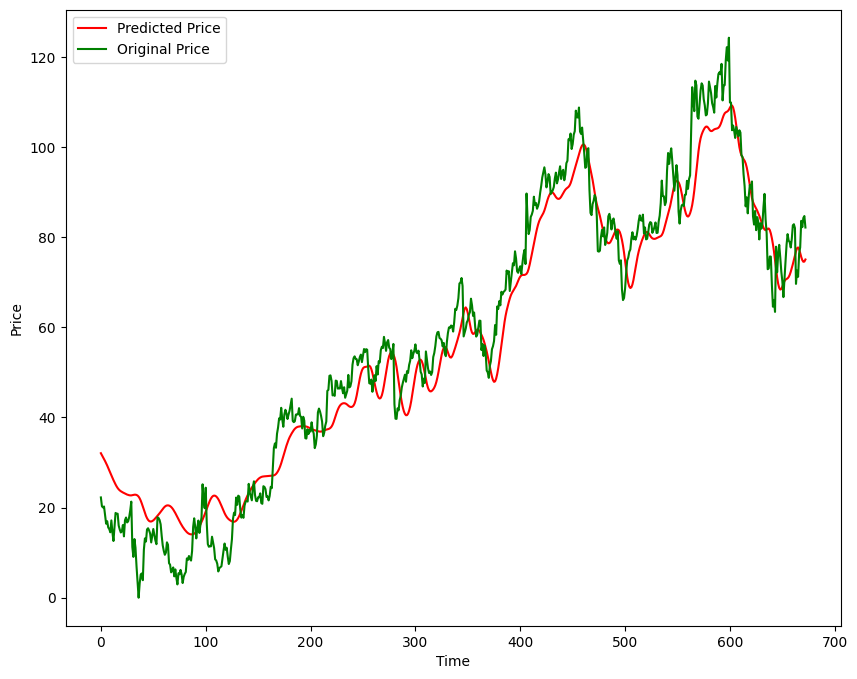

In [36]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [38]:
model.save('Stock Predictions Model.keras')